# Задание 1


1. Получите выборку с помощью следующего вызова:
```
make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Напишите метрику качества (`accuracy`), которая получается, если применить обученный `GridSearchCV` к тестовой выбоке.

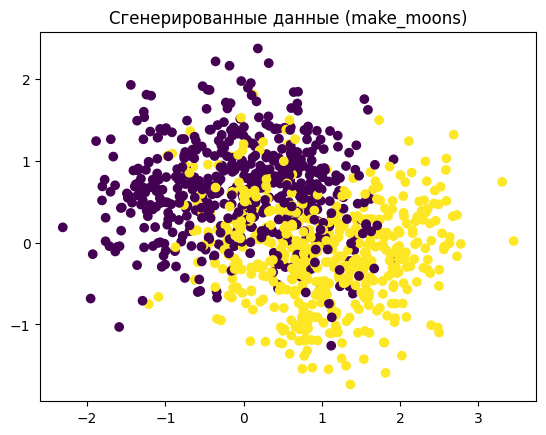

Лучшая точность (accuracy) на тестовой выборке: 0.835
Лучший параметр n_neighbors: 16


In [26]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Генерация выборки с помощью make_moons
X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)

# Визуализация данных для наглядности
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Сгенерированные данные (make_moons)")
plt.show()

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Настройка параметров для GridSearchCV
# Перебираем значения n_neighbors от 1 до 20
param_grid = {'n_neighbors': range(1, 21)}

# Настройка кросс-валидации с использованием KFold
kfold = KFold(n_splits=5, random_state=10, shuffle=True)

# Настройка и запуск GridSearchCV для поиска лучшего параметра K
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Прогнозирование на тестовой выборке с лучшей моделью
y_pred = grid_search.best_estimator_.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Лучшая точность (accuracy) на тестовой выборке: {accuracy}")

# Лучшая найденная модель и её параметры
print(f"Лучший параметр n_neighbors: {grid_search.best_params_['n_neighbors']}")

# Задание 2


Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от одного до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра.

Код ниже строит изображения средней зависимости качества от количества соседей. Выберите картинку, которая у вас получилась.


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train_grid_search(X, y):
    # Задаем диапазон значений для параметра n_neighbors
    param_grid = {'n_neighbors': range(1, 21)}
    
    # Настройка кросс-валидации (KFold с 5 фолдами)
    kfold = KFold(n_splits=5, shuffle=True, random_state=10)
    
    # Создание объекта GridSearchCV
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, scoring='accuracy')
    
    # Обучение модели на данных X и y
    grid_search.fit(X, y)
    
    # Возвращение среднего значения метрики для каждого параметра n_neighbors
    return grid_search.cv_results_['mean_test_score']

# Задание 3

In [28]:
from mnist import MNIST
import numpy as np

mndata = MNIST('./dir_with_mnist_data_files', gz=True)  
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

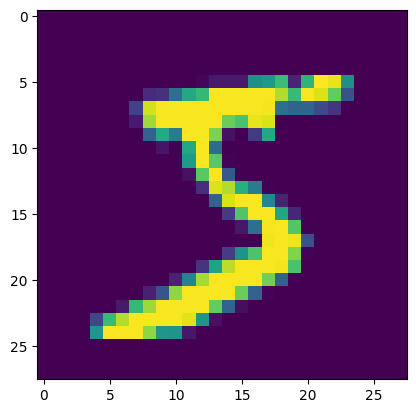

In [29]:
plt.imshow(images[0].reshape(28, 28))

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузит данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20. Какой accuracy вы получаете на тестовой выборке?

Accuracy на тестовой выборке: 0.9574285714285714


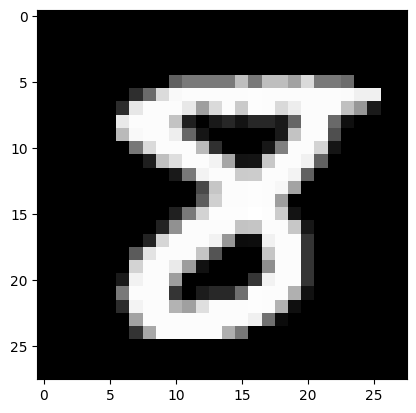

In [30]:
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Загружаем данные
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Объединяем данные и делим их в пропорции 80/20
images = np.concatenate((train_images, test_images))
labels = np.concatenate((train_labels, test_labels))

X_train, X_test, y_train, y_test = train_test_split(images.reshape(-1, 28*28), labels, test_size=0.2, random_state=42)

# Обучение модели KNN с 30 соседями
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy на тестовой выборке:", accuracy)

# Отображение изображения 
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.show()

# Задание 4 (неоцениваемое)

Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?